## Loading data

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define a transform to convert the images to tensor
transform = transforms.Compose([transforms.ToTensor()])

In [3]:
# Download the MNIST training dataset
mnist_train = datasets.MNIST(root='../data', train=True, download=True, transform=transform)

# Download the MNIST test dataset
mnist_test = datasets.MNIST(root='../data', train=False, download=True, transform=transform)


In [4]:
# Convert to NumPy arrays
train_data_np = mnist_train.data.numpy()

In [5]:
image = train_data_np[0]

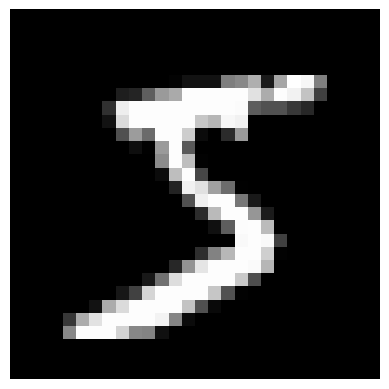

In [6]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# data processing


In [7]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=64, shuffle=False)

In [8]:
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Remove this line to iterate through the entire DataLoader

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


# Building simple NN

In [9]:
import torch.nn as nn

In [10]:
# Define the MLP model
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)     # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)  # Output layer
        return x

In [11]:
Neural_Network = NN()

# Training your Network

In [12]:
import torch.optim as optim
learning_rate = 0.002
criterion = nn.CrossEntropyLoss() # mutliclass classification
optimizer = optim.Adam(Neural_Network.parameters(), lr=learning_rate)
epochs = 10
# Training loop
for epoch in range(epochs):
    Neural_Network.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = Neural_Network(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch}')


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [14]:
!pip install scikit-learn

  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ------------------ --------------------- 5.2/11.2 MB 35.3 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.2 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 24.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)


In [15]:
# Evaluation loop
from sklearn.metrics import confusion_matrix

Neural_Network.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = Neural_Network(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

In [16]:
conf_matrix = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 970    0    1    0    1    1    1    1    3    2]
 [   0 1127    3    0    0    0    1    0    4    0]
 [   3    3 1007    6    0    1    2    8    1    1]
 [   1    0    2  984    0    4    0    6    3   10]
 [   0    0   10    0  946    3    1    3    0   19]
 [   4    1    0   21    1  848    4    1    7    5]
 [  11    1    1    0   14    2  928    0    1    0]
 [   1    2   10    0    1    0    0 1008    2    4]
 [   7    0    6    3    3    2    0    5  943    5]
 [   1    3    2    0   10    0    1    3    2  987]]
